# Exploring Text Data (2)

## PyConUK talk abstract

Data set of abstracts for the PyConUK 2016 talks (retrieved 14th Sept 2016 from https://github.com/PyconUK/2016.pyconuk.org)

The data can be found in `../data/pyconuk2016/{keynotes,workshops,talks}/*`

There are 101 abstracts

## Load the data

Firstly, we load all the data into the `documents` dictionary

We also merge the documents into one big string, `corpus_all_in_one`, for convenience

In [2]:
import os

data_dir = os.path.join('data', 'pyconuk2016')

talk_types = ['keynotes', 'workshops', 'talks']

all_talk_files = [os.path.join(data_dir, talk_type, fname)
                  for talk_type in talk_types
                  for fname in os.listdir(os.path.join(data_dir, talk_type))]

documents = {}
for talk_fname in all_talk_files:
    bname = os.path.basename(talk_fname)
    talk_title = os.path.splitext(bname)[0]
    with open(talk_fname, 'r') as f:
        content = f.read()
        documents[talk_title] = content
        
corpus_all_in_one = ' '.join([doc for doc in documents.values()])
        
print("Number of talks: {}".format(len(all_talk_files)))
print("Corpus size (char): {}".format(len(corpus_all_in_one)))

Number of talks: 101
Corpus size (char): 78067


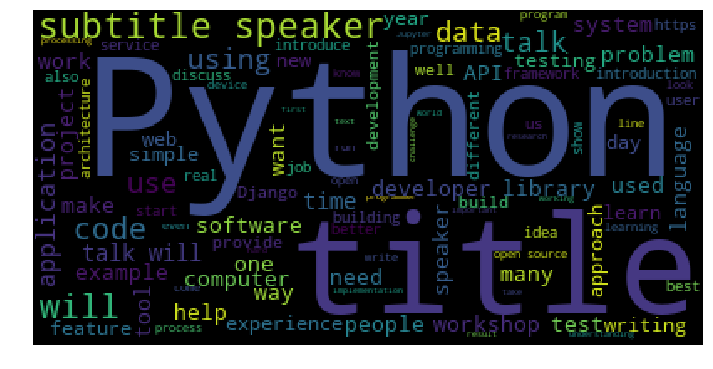

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_words=100)
cloud.generate_from_text(corpus_all_in_one)

plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [4]:
all_talk_files[0]

'data/pyconuk2016/keynotes/folklore-and-fantasy-in-the-information-age.md'

In [5]:
%cat {all_talk_files[0]}

# For a list of magics type:
# %lsmagic

title: 'Folklore and fantasy in the information age'
subtitle:
speaker: gail-ollis
---


In [6]:
documents = {}
for talk_fname in all_talk_files:
    bname = os.path.basename(talk_fname)
    talk_title = os.path.splitext(bname)[0]
    with open(talk_fname, 'r') as f:
        content = ""
        for line in f:
            if line.startswith('title:'):
                line = line[6:]
            if line.startswith('subtitle:') \
            or line.startswith('speaker:') \
            or line.startswith('---'):
                continue
            content += line
        documents[talk_title] = content

corpus_all_in_one = ' '.join([doc for doc in documents.values()])

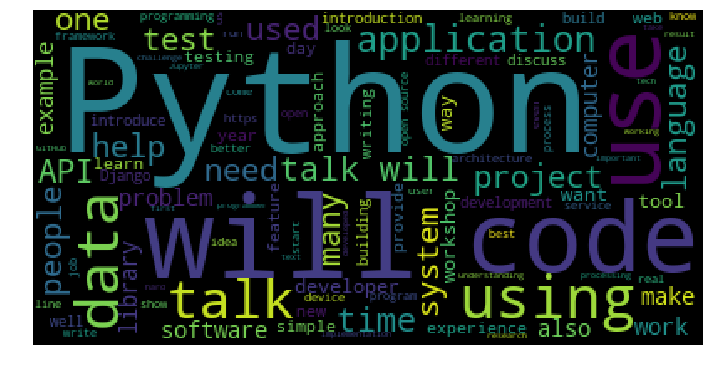

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_words=100)
cloud.generate_from_text(corpus_all_in_one)

plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [8]:
from collections import Counter
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_list = stopwords.words('english') + list(string.punctuation)

document_frequency = Counter()

for talk_id, content in documents.items():
    try:  # py3
        tokens = word_tokenize(content)
    except UnicodeDecodeError:  # py27
        tokens = word_tokenize(content.decode('utf-8'))
    unique_tokens = [token.lower() for token in set(tokens)
                     if token.lower() not in stop_list]
    document_frequency.update(unique_tokens)

for word, freq in document_frequency.most_common(20):
    print("{}\t{}".format(word, freq))

python	63
talk	59
code	37
using	36
use	33
's	31
data	28
'll	21
used	21
one	19
many	19
help	19
also	19
language	18
time	18
learning	18
development	18
''	17
show	16
people	16


In [9]:
# print(stop_list)
for item in ['will', "'ll", 'll']:
    print("{} in stop_list == {}".format(item, item in stop_list))

will in stop_list == True
'll in stop_list == False
ll in stop_list == True


In [10]:
from nltk import ngrams

try:
    all_tokens = [t for t in word_tokenize(corpus_all_in_one)]
except UnicodeDecodeError:
    all_tokens = [t for t in word_tokenize(corpus_all_in_one.decode('utf-8'))]

bigrams = ngrams(all_tokens, 2)
trigrams = ngrams(all_tokens, 3)

bi_count = Counter(bigrams)
tri_count = Counter(trigrams)

for phrase, freq in bi_count.most_common(20):
    print("{}\t{}".format(phrase, freq))
    
for phrase, freq in tri_count.most_common(20):
    print("{}\t{}".format(phrase, freq))

(',', 'and')	82
('of', 'the')	56
('.', 'This')	41
('how', 'to')	40
('is', 'a')	31
('This', 'talk')	31
('talk', 'will')	28
('.', 'We')	27
('.', 'It')	25
('will', 'be')	25
('in', 'the')	24
('.', 'In')	24
('and', 'how')	23
('.', 'I')	23
('can', 'be')	21
('some', 'of')	21
(',', 'the')	21
('.', 'The')	21
('In', 'this')	20
('you', 'can')	20
('.', 'This', 'talk')	21
('This', 'talk', 'will')	21
('.', 'In', 'this')	16
('some', 'of', 'the')	15
('.', 'We', "'ll")	12
('(', 'https', ':')	11
('In', 'this', 'talk')	11
(']', '(', 'https')	9
('as', 'well', 'as')	9
('how', 'you', 'can')	8
('and', 'how', 'to')	8
('this', 'talk', ',')	8
('?', 'This', 'talk')	8
('.', 'I', 'will')	7
('one', 'of', 'the')	6
(',', 'and', 'how')	6
('.', 'We', 'will')	6
('show', 'how', 'to')	5
('to', 'build', 'a')	5
('AWS', 'Elastic', 'Beanstalk')	5


## Term Frequency (TF)

TF provides a weight of a term within a document, based on the term frequency

TF(term, doc) = count(term in doc)

TF(term, doc) = count(term in doc) / len(doc)


## Inverse Document Frequency (IDF)

IDF provides a weight of a term across the collection, based on the document frequency of such term

IDF(term) = log( N / DF(term) )

IDF(term) = log( 1 + N / DF(term) )

## Introducing sklearn

So far, we have used some homemade implementation to count words

What if we need something more involved?

sklearn (http://scikit-learn.org/) is one of the main libraries for Machine Learning in Python

With an easy-to-use interface, it provides support for a variety of Machine Learning models

We're going to use it to tackle a Text Classification problem
